(60000, 28, 28, 1) หมายความว่า X_train เป็น Tensor 4 มิติ
มิติที่ 1: มี 60000 ภาพ (จำนวนตัวอย่างหรือ samples)
มิติที่ 2: แต่ละภาพมีขนาด 28 พิกเซลในแนวตั้ง (สูง)
มิติที่ 3: แต่ละภาพมีขนาด 28 พิกเซลในแนวนอน (กว้าง)
มิติที่ 4: มี 1 ช่องทาง (channel) ซึ่งหมายถึงภาพขาวดำ (grayscale image)

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input , Dense , Conv2D , MaxPooling2D , Flatten , Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.image import rgb_to_grayscale

from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
from PIL import Image ,  ImageOps

np.set_printoptions(suppress=True)

In [23]:


def visual_multi(X_train):
    nplots = 30
    fig = plt.figure(figsize=(9,6))
    for j in range(nplots):
        rnd = np.random.randint(X_train.shape[0])
        plt.subplot(4,10,j+1)
        plt.imshow(X_train[rnd]  , cmap='gray')
        plt.yticks([]);plt.xticks([])
    plt.show()
    
    return 
        
        
def visual_label(data):
    x , y = np.unique(data , return_counts=True)
    sns.barplot(x=x,y=y)
    plt.title('Label');
    plt.show()
    
def visual_graph(history):

    plt.figure(figsize=(12,5.5))

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'],color='b',label='Training')
    plt.plot(history.history['val_loss'],color='r',label='val_Training')
    plt.title('Loss')
    plt.legend()
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'],color='b',label='Training')
    plt.plot(history.history['val_accuracy'],color='r',label='val_Training')
    plt.title('Accuracy')
    plt.legend()
    plt.grid()
    return

def rescale(X_train , X_test):
    
    X_train = np.expand_dims(X_train , -1)
    X_test = np.expand_dims(X_test , -1)

    X_train = X_train / 255
    X_test =  X_test / 255

    print('reshape to tensor:',X_train.shape)
    print('reshape to tensor:',X_test.shape)    

    return X_train , X_test

def extract_class(y_train):
    return len(np.unique(y_train))

def extract_inputshape(X_train):
    return X_train.shape[1:]

def create_model(in_shape , num_classes):

    model = Sequential()
    model.add(Input(shape=(in_shape)))

    model.add(Conv2D(32 , (3,3) , activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(64 , (3,3) , activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.3))


    model.add(Flatten())
    model.add(Dense(256 , activation='relu'))
    model.add(Dense(num_classes , activation='softmax'))
    
    return model

def train_model(model ,X_train,y_train, input_epochs , input_batch_size , input_validation_split):
    model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
    Er = EarlyStopping(patience=10)

    history = model.fit(X_train , y_train , 
                        epochs=input_epochs ,
                        batch_size=input_batch_size , 
                        verbose=0 , 
                        validation_split=input_validation_split , 
                        callbacks=[Er])
    return history


def evaluate_model(X_test , y_test):
    loss , score = model.evaluate(X_test , y_test)
    print('Loss:',loss)
    print('Score:',score)

def visulize_confusion(model , X_test):
    y_pred = np.argmax(model.predict(X_test) , axis=1)
    cm = confusion_matrix(y_test , y_pred)
    ConfusionMatrixDisplay(cm ).plot();
    
    
def prediction(img_name , in_shape):
    
    img = load_img(img_name , target_size=in_shape)
    img_ops = ImageOps.invert(img)
    img_arr = img_to_array(img_ops)
    img_gray = rgb_to_grayscale(img_arr)
    img_tensor = np.expand_dims(img_gray , axis=0) / 255
    
    y_pred = model.predict(img_tensor)
    print(y_pred)
    print('Predicted:',np.argmax(y_pred , axis=1))
    
    plt.imshow(img_ops ,  cmap='gray')
    plt.show()




In [25]:
(X_train , y_train),(X_test , y_test) = load_data()

X_train , X_test = rescale(X_train , X_test)
in_shape = extract_inputshape(X_train)
model    = create_model( in_shape , extract_class(y_train))
history  = train_model(model,X_train,y_train,50,256,0.4)


reshape to tensor: (60000, 28, 28, 1)
reshape to tensor: (10000, 28, 28, 1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.0389
Loss: 0.031928159296512604
Score: 0.9904000163078308
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


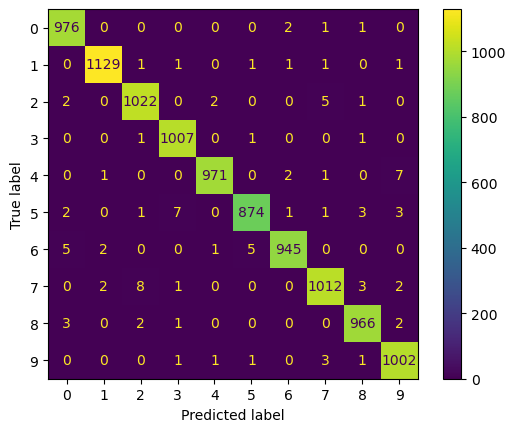

In [26]:
evaluate_model(X_test , y_test)
visulize_confusion(model , X_test)

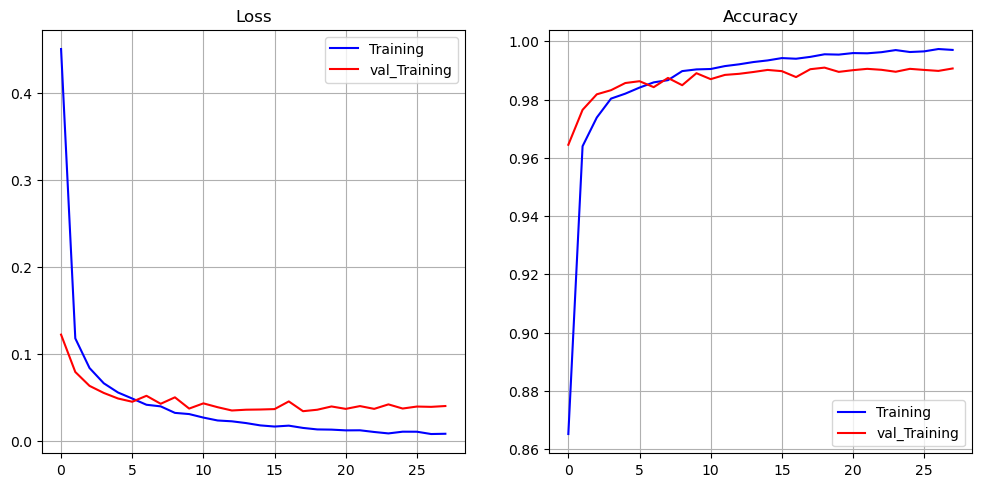

In [27]:
visual_graph(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[0.         0.         0.         1.         0.         0.
  0.         0.         0.00000002 0.00000001]]
Predicted: [3]


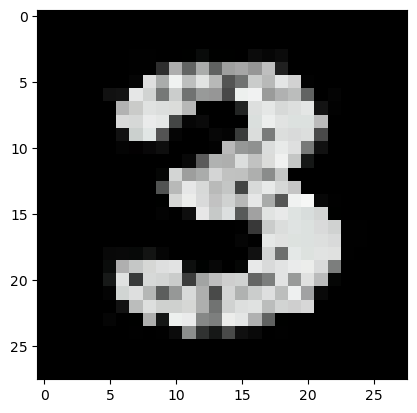

In [31]:
prediction('33.png' , in_shape)